<a href="https://colab.research.google.com/github/sulphatet/tumor_diagnosis_demo/blob/main/tumor_diagnosis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for plotting
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [60]:
cancer_data = datasets.load_breast_cancer()

In [61]:
#print(cancer_data)
X,y = cancer_data.data,cancer_data.target
#print(len(X)==len(y))
X= preprocessing.scale(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


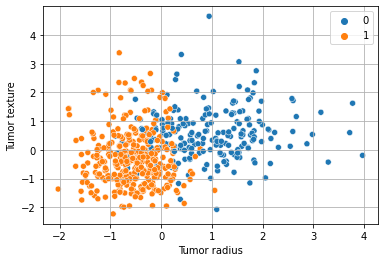

In [62]:
sns.scatterplot(X[:,0],X[:,1],hue = y)
plt.xlabel('Tumor radius')
plt.ylabel('Tumor texture')
plt.grid(True)
plt.show()

In [63]:
alpha = np.arange(10**-15,1,0.005)
scores = np.zeros((len(alpha),1))

In [64]:
for i in range(len(alpha)):
  model = linear_model.SGDClassifier(alpha = alpha[i])
  score = ms.cross_val_score(model,X,y)
  scores[i] = score.mean()

In [65]:
#print(scores)

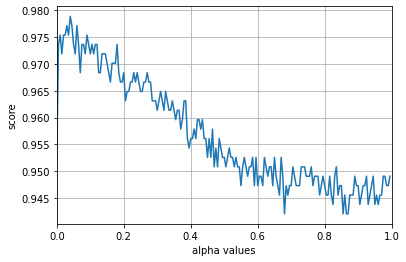

In [66]:
plt.plot(alpha,scores)
plt.grid(True)
plt.xlim(0,1)
plt.xlabel('alpha values')
plt.ylabel('score')
plt.show()

In [67]:
index = np.argmax(scores)
alpha_star = alpha[index]
print(alpha_star)

0.040000000000001


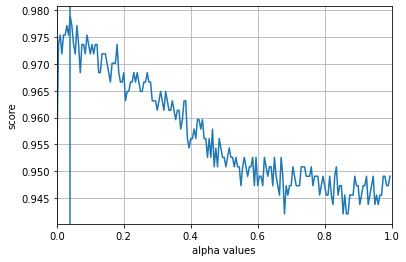

In [68]:
plt.plot(alpha,scores)
plt.axvline(alpha_star)
plt.grid(True)
plt.xlim(0,1)
plt.xlabel('alpha values')
plt.ylabel('score')
plt.show()

In [69]:
best_model = linear_model.SGDClassifier(alpha = alpha_star)
model_trained = best_model.fit(X,y)
print(model_trained.score(X,y))

0.9806678383128296


In [71]:
model_trained.coef_[0,1]

-0.2722315218275752

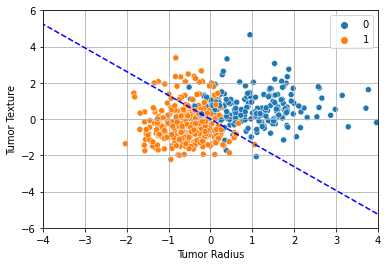

In [77]:
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
x1 = np.arange(-10,+10,0.5)
y1 = slope*x1
sns.scatterplot(x = X[:, 0], y=X[:, 1], hue=y)
plt.plot(x1,y1,'--b')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()